# School dropout model

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading data training data.
data = pd.read_csv('data/train_data_week_1_challenge.csv')
data.head()


,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


##  Doing the real thing

###  Observation and Preparation of data

In [3]:
# checking for null values in the dataset
data.isnull().sum()

continue_drop           0
student_id              0
gender                  0
caste                   0
mathematics_marks       0
english_marks           0
science_marks           0
science_teacher         0
languages_teacher       0
guardian                0
internet                0
school_id               0
total_students          0
total_toilets         312
establishment_year    312
dtype: int64

In [4]:
# filling null values in the dataset
data["total_toilets"].fillna(data["total_toilets"].mean(), inplace = True)
data["establishment_year"].fillna(data["establishment_year"].mean(), inplace = True)
data.isnull().sum()


continue_drop         0
student_id            0
gender                0
caste                 0
mathematics_marks     0
english_marks         0
science_marks         0
science_teacher       0
languages_teacher     0
guardian              0
internet              0
school_id             0
total_students        0
total_toilets         0
establishment_year    0
dtype: int64

In [5]:
# encoding categorical values
cleanup_nums = {"continue_drop":{"continue":1,"drop":0},
                "gender":{"F":0,"M":1},
                "caste":{"BC":0,"SC":1,"OC":2,"ST":3},
                "guardian":{"mother":0,"father":1,"other":2,"mixed":3}
               }

data.replace(cleanup_nums, inplace=True)

data.internet = data.internet.astype(int)
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,s01746,1,0,0.666,0.468,0.666,7,6,2,1,305,354,86.0,1986.0
1,1,s16986,1,0,0.172,0.420,0.172,8,10,0,0,331,516,15.0,1996.0
2,1,s00147,0,0,0.212,0.601,0.212,1,4,0,0,311,209,14.0,1976.0
3,1,s08104,0,3,0.434,0.611,0.434,2,5,1,1,364,147,28.0,1911.0
4,1,s11132,0,1,0.283,0.478,0.283,1,10,0,1,394,122,15.0,1889.0


In [6]:
# dropping unused columns
data.drop('student_id', axis=1, inplace=True)
data.drop('school_id', axis=1, inplace=True)
data.drop('establishment_year', axis=1, inplace=True)
data.head()

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students,total_toilets
0,1,1,0,0.666,0.468,0.666,7,6,2,1,354,86.0
1,1,1,0,0.172,0.420,0.172,8,10,0,0,516,15.0
2,1,0,0,0.212,0.601,0.212,1,4,0,0,209,14.0
3,1,0,3,0.434,0.611,0.434,2,5,1,1,147,28.0
4,1,0,1,0.283,0.478,0.283,1,10,0,1,122,15.0


# Data balancing using oversampling

In [7]:
# Get the normal and fraud data set
normal = data[data['continue_drop']==1]
fraud = data[data['continue_drop']==0]

In [8]:
print(fraud.shape,normal.shape)

(806, 12) (16384, 12)


In [9]:
from imblearn.combine import SMOTETomek

In [10]:
feature = ['gender', 'caste', 'mathematics_marks', 'english_marks', 'science_marks', 'science_teacher', 'languages_teacher', 'guardian', 'internet', 'total_students',
       'total_toilets']

X= data[feature]
y= data.continue_drop

In [11]:
#implementing oversampling for handling imbalance
smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_sample(X,y)

In [12]:
X_res.shape,y_res.shape

((32642, 11), (32642,))

In [13]:
from collections import Counter

In [14]:
print('original {}', format(Counter(y)))
print('resampled {}', format(Counter(y_res)))

original {} Counter({1: 16384, 0: 806})
resampled {} Counter({1: 16321, 0: 16321})


In [15]:
#RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [16]:
# We parse the argument ratio=1 so that we can have the proportion of 1
os = RandomOverSampler(ratio=1)

X_train_res,y_train_res = os.fit_sample(X,y)
X_train_res.shape,y_train_res.shape

((32768, 11), (32768,))

### Feature Selection

In [17]:
# feature Importance
from sklearn.ensemble import RandomForestRegressor
# Define a model
rforest = RandomForestRegressor()
# Fit the model
rforest.fit(X_train_res,y_train_res)

C:\Users\USER\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [18]:
# Importing libraries for feature visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

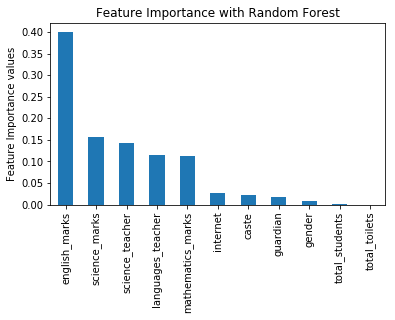

In [19]:
# Plot the important features
imp_feat_rf = pd.Series(rforest.feature_importances_, index=X.columns).sort_values(ascending=False)
imp_feat_rf.plot(kind='bar', title='Feature Importance with Random Forest', color='C0')
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)

In [20]:
# dropping less important features
X.drop('total_toilets', axis=1, inplace=True)
X.drop('total_students', axis=1, inplace=True)
X.head()

C:\Users\USER\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet
0,1,0,0.666,0.468,0.666,7,6,2,1
1,1,0,0.172,0.420,0.172,8,10,0,0
2,0,0,0.212,0.601,0.212,1,4,0,0
3,0,3,0.434,0.611,0.434,2,5,1,1
4,0,1,0.283,0.478,0.283,1,10,0,1


In [21]:
sel_features = ['gender', 'caste', 'mathematics_marks', 'english_marks', 'science_marks', 'science_teacher', 'languages_teacher', 'guardian', 'internet']
x1 = X[sel_features]

### Model selection

In [22]:
# Spilling of Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.25,
                                                    random_state=1234)

In [23]:
# logistic Regression model
from sklearn.linear_model import LogisticRegression   # 1. choose model class
model_one = LogisticRegression()                          # 2. instantiate model
model_one.fit(x_train, y_train)   

C:\Users\USER\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# predicting new data
y_pred1 = model_one.predict(x_test) 


In [25]:
#f1_score metric
from sklearn.metrics import f1_score
test_acc = f1_score(y_test, y_pred1)
print("Test Accuracy: {}".format(test_acc))

Test Accuracy: 0.9752026704816403


In [26]:
# Crossing checking predicted and actual data
from sklearn.metrics import confusion_matrix
value = confusion_matrix(y_test,y_pred1)
value

array([[   0,  208],
       [   0, 4090]], dtype=int64)

In [27]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rForest = RandomForestClassifier(n_estimators=10)
rForest.fit(x_train, y_train)             

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
# Prediction and accuracy check
y_pred2 = rForest.predict(x_test)                      
test_acc  = f1_score(y_test, y_pred2)
print("Test Accuracy: {}" .format(test_acc))

Test Accuracy: 1.0


In [29]:
# Cross checking predicted and actual value
value = confusion_matrix(y_test,y_pred2)
value

array([[ 208,    0],
       [   0, 4090]], dtype=int64)

In [30]:
# K neighbor model
from sklearn.neighbors import KNeighborsClassifier       # 1. choose model class
knn = KNeighborsClassifier(n_neighbors=3)               # 2. instantiate model
knn.fit(x_train, y_train)                    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [31]:
# predict on new data and accuracy
y_pred3 = knn.predict(x_test)                      
test_acc  = f1_score(y_test, y_pred3)
print("Test Accuracy: {}" .format(test_acc))



Test Accuracy: 1.0


In [32]:
value = confusion_matrix(y_test,y_pred3)
value

array([[ 208,    0],
       [   0, 4090]], dtype=int64)

### Predicting new data

In [33]:
# loading test data
t_data = pd.read_csv('data/test_data_week_1_challenge.csv')
t_data.head()


,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,s00529,F,BC,0.212,0.601,0.212,1,4,mother,False,341,430,44.0,1959.0
1,s13519,F,BC,0.511,0.551,0.511,1,5,mother,True,329,275,60.0,1914.0
2,s01753,M,BC,0.890,0.644,0.890,2,2,mother,True,390,140,14.0,1972.0
3,s00034,F,BC,0.355,0.373,0.355,7,4,mother,True,336,206,17.0,1940.0
4,s03027,F,BC,0.691,0.147,0.691,4,3,father,True,361,287,15.0,1992.0


In [34]:
# encoding categorical values
cleanup_nums = {
                "gender":{"F":0,"M":1},
                "caste":{"BC":0,"SC":1,"OC":2,"ST":3},
                "guardian":{"mother":0,"father":1,"other":2,"mixed":3}
               }

t_data.replace(cleanup_nums, inplace=True)

t_data.internet = t_data.internet.astype(int)
t_data.head()


,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,s00529,0,0,0.212,0.601,0.212,1,4,0,0,341,430,44.0,1959.0
1,s13519,0,0,0.511,0.551,0.511,1,5,0,1,329,275,60.0,1914.0
2,s01753,1,0,0.890,0.644,0.890,2,2,0,1,390,140,14.0,1972.0
3,s00034,0,0,0.355,0.373,0.355,7,4,0,1,336,206,17.0,1940.0
4,s03027,0,0,0.691,0.147,0.691,4,3,1,1,361,287,15.0,1992.0


In [35]:
# dropping less important features
t_data.drop('total_toilets', axis=1, inplace=True)
t_data.drop('total_students', axis=1, inplace=True)
t_data.drop('student_id', axis=1, inplace=True)
t_data.drop('school_id', axis=1, inplace=True)
t_data.drop('establishment_year', axis=1, inplace=True)

t_data.head()


,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet
0,0,0,0.212,0.601,0.212,1,4,0,0
1,0,0,0.511,0.551,0.511,1,5,0,1
2,1,0,0.890,0.644,0.890,2,2,0,1
3,0,0,0.355,0.373,0.355,7,4,0,1
4,0,0,0.691,0.147,0.691,4,3,1,1


In [36]:
sel_features = ['gender', 'caste', 'mathematics_marks', 'english_marks', 'science_marks', 'science_teacher', 'languages_teacher', 'guardian', 'internet']
w= t_data[sel_features]



In [37]:
# predicting new data
pred = knn.predict(w)
result = np.array(pred)                        
result

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
#saving result
np.save("Results.npy",result)